# Intro to **Feature Engineering**
![feature engineering.png](<attachment:feature engineering.png>)

# Importance of feature engineering
![importence of feature engineering f.png](<attachment:importence of feature engineering f.png>)

# **Data Preprocessing and Feature Engineering** :
The following diagram illustrates the various steps involved in data preprocessing and feature engineering:


![feature engineering technique.png](<attachment:feature engineering technique.png>)

# Data Cleaning

Data cleaning is the first and crucial step in the feature engineering process. It involves identifying and correcting (or removing) errors and inconsistencies in the data to improve data quality. Proper data cleaning helps in creating a robust dataset that leads to more accurate models.


![data cleaning 2 .png](<attachment:data cleaning 2 .png>)

# Missing Data
There are times when there are observations (rows) with missing data and sometimes you can have entire columns with completely missing values. So what do we do in instances like this? Do we ignore it? This can be likened to a leaking roof and when it rains, it leaks.

Missing values have different representations across different tools. These representations include NULL, empty strings, NaN, NA, #NA, etc. Data context is important in dealing with missing data, and understanding why data is missing is crucial. There are two primary methods for dealing with missing data:

#### Removal of data
#### Imputation of data
![final handling missing data.jpg](<attachment:final handling missing data.jpg>)

# Reference

https://scikit-learn.org/stable/modules/impute.html

# Method 1. Removing the Data

The first step that we should do is to check if a dataset has any missing values. A model cannot accept missing values. So one common and easy method to handle missing values is to delete the entire row if there is any missing value in that row or we delete an entire column if it has 70 to 75% of missing data, however this percent limit is not fixed and mostly depends on what kind of data we are dealing with, and what kind of features are there in the dataset.


Advantage of this method is, it’s a pretty quick and dirty method of fixing the missing values issue. But this is not always the goto method as you might sometime end up losing critical information by deleting the features.



In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# DataSet

In [5]:

import seaborn as sns
import pandas as pd
import numpy as np

# Load Titanic dataset
df = sns.load_dataset('titanic')


# Difference between Listwise and Pairwise Deletion

## Listwise Deletion

- **Definition**: In listwise deletion, a case (row) is dropped from the analysis if it has a missing value in any of the variables being analyzed.
- **Data Completeness**: This ensures that the analysis is only run on cases with a complete set of data.
- **Data Loss**: It can lead to significant data loss if many cases have at least one missing value.

## Pairwise Deletion

- **Definition**: Pairwise deletion uses all available data for each analysis.
- **Selective Exclusion**: If a case has a missing value for a particular variable, it is excluded only from the analysis involving that variable but can still be used in analyses involving other variables with non-missing values.
- **Data Usage**: This approach allows for more data to be used but can lead to inconsistencies in the data subsets used for different analyses, which may affect the statistical results.


# 1.1: Listwise Deletion
it means Removes all rows that have any missing values and in this we use dropna method and this have parameter 'how=any or all ' default is 'any' used so below given image we see clearly convcept of both 
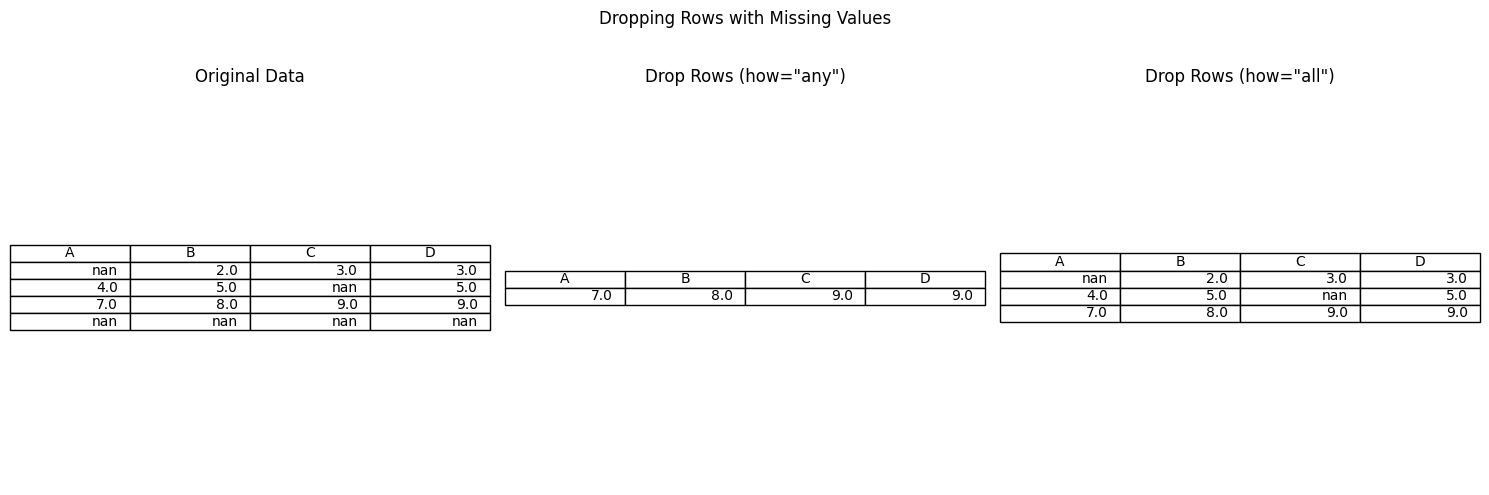

### Reference

more detail on listwise  and pairwise deletion
https://www.ibm.com/support/pages/pairwise-vs-listwise-deletion-what-are-they-and-when-should-i-use-them#:~:text=Pairwise%20deletion%20occurs%20when%20the,VAR1%2C%20VAR2%2C%20and%20VAR3.


### **Listwise Deletion** code implementation

In [9]:
# Display the first few rows of the dataset
print("\nMissing values in each column:")
print(df.isnull().sum())


Missing values in each column:
survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


In [10]:
## Listwise Deletion
listwise_df = df.dropna()
print("\nListwise Deletion DataFrame:")
print(listwise_df.head())


Listwise Deletion DataFrame:
    survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
1          1       1  female  38.0      1      0  71.2833        C  First   
3          1       1  female  35.0      1      0  53.1000        S  First   
6          0       1    male  54.0      0      0  51.8625        S  First   
10         1       3  female   4.0      1      1  16.7000        S  Third   
11         1       1  female  58.0      0      0  26.5500        S  First   

      who  adult_male deck  embark_town alive  alone  
1   woman       False    C    Cherbourg   yes  False  
3   woman       False    C  Southampton   yes  False  
6     man        True    E  Southampton    no   True  
10  child       False    G  Southampton   yes  False  
11  woman       False    C  Southampton   yes   True  


# 1.2:Pairwise Deletion
 Pairwise deletion is often handled implicitly during analysis, 
 so for demonstration, we'll consider only columns involved in a specific computation.
 ![listwise pairwise deletion .png](<attachment:listwise pairwise deletion .png>)

# **Pairwise Deletion** code implementation


Pairwise Deletion Correlation Matrix:


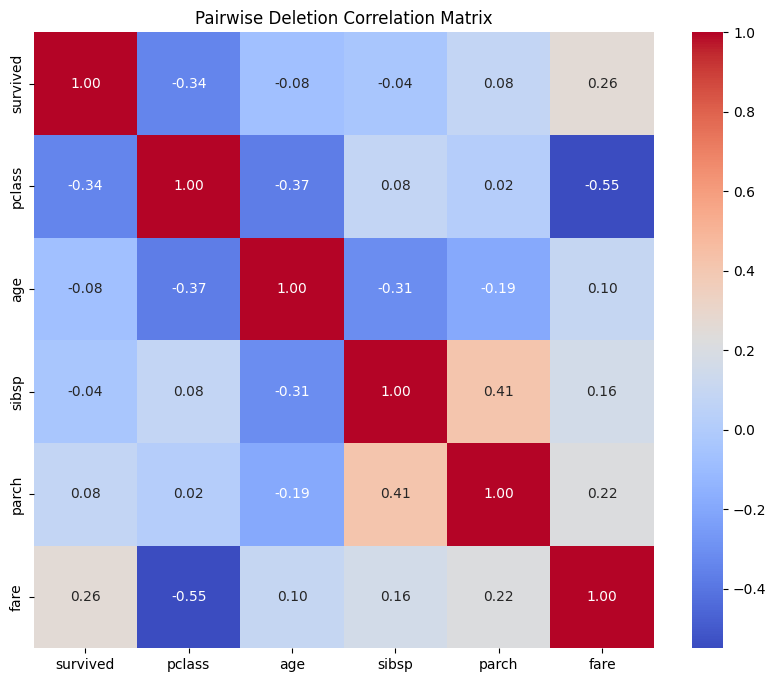

In [5]:
# Select only continuous variables (numeric columns)
continuous_df = df.select_dtypes(include=[np.number])

# Pairwise Deletion
pairwise_correlations = continuous_df.corr(min_periods=1)
print("\nPairwise Deletion Correlation Matrix:")

plt.figure(figsize=(10, 8))
sns.heatmap(pairwise_correlations, cmap='coolwarm', annot=True, fmt='.2f')
plt.title('Pairwise Deletion Correlation Matrix')
plt.show()


# 1.3: Dropping Columns

If data is missing for a large proportion of the observations, it may be best to discard the column entirely if it is insignificant

![drop columns.png](<attachment:drop columns.png>)

In [12]:
# Dropping Columns
listwise_df = df.dropna(axis=1,how="any")
print("\nListwise Deletion DataFrame:")
print(listwise_df.head())


Listwise Deletion DataFrame:
   survived  pclass     sex  sibsp  parch     fare  class    who  adult_male  \
0         0       3    male      1      0   7.2500  Third    man        True   
1         1       1  female      1      0  71.2833  First  woman       False   
2         1       3  female      0      0   7.9250  Third  woman       False   
3         1       1  female      1      0  53.1000  First  woman       False   
4         0       3    male      0      0   8.0500  Third    man        True   

  alive  alone  
0    no  False  
1   yes  False  
2   yes   True  
3   yes  False  
4    no   True  


# 2. Imputation
## 2.1 Univariate Imputation

# Mean Imputation vs Median Imputation

## Introduction

When dealing with missing data, mean and median imputation are common techniques used to fill in the gaps. Each method has its strengths and is suitable under different circumstances. This guide provides an overview of when to use mean versus median imputation, their effects on data distribution, and the importance of adding missing indicators.

## When to Use Mean or Median Imputation

### Mean Imputation
- **Normal Distribution**: Use mean imputation if the data is symmetrically distributed (approximately normal distribution).
- **Small Percentage of Missing Data**: When the proportion of missing data is small, mean imputation can be effective.
- **No Strong Relationships with Other Variables**: When missing values are not strongly dependent on other features.

### Median Imputation
- **Skewed Distribution**: Use median imputation if the data is skewed, as the median is less affected by outliers than the mean.
- **Presence of Outliers**: Median is robust to outliers, making it a better estimate of the center of the distribution in such cases.
- **Skewed Variables**: In skewed distributions, the median provides a better estimate of the center of mass.

## Graphical Representation

In the following image, we see how the median is moved away from the distribution center when the variables have a strong left or right skew:

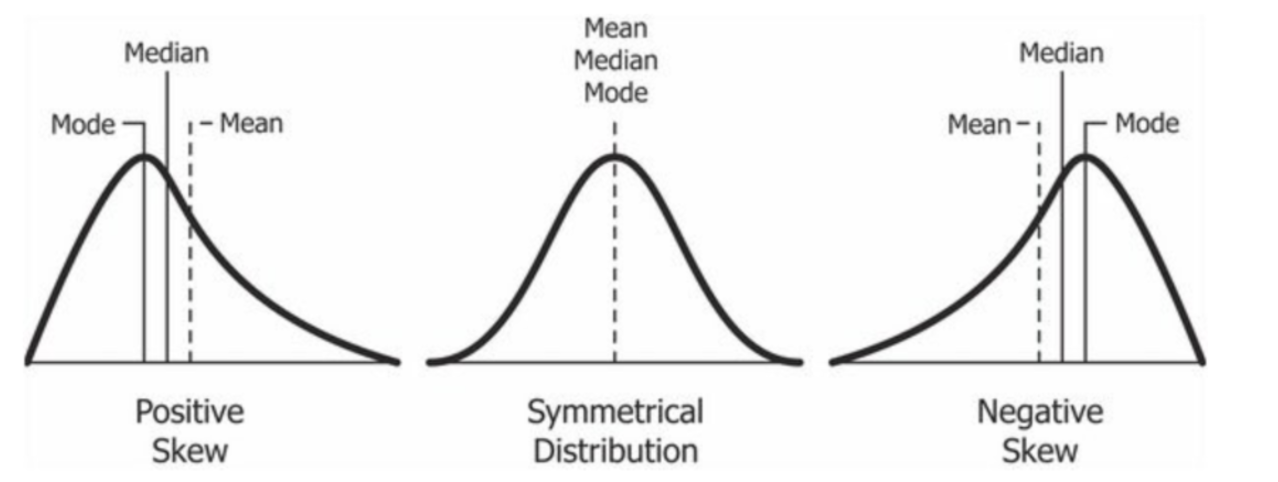



## Effects on Variable Distribution

### Reduced Variability
- **Mean/Median Imputation**: Imputation with the mean or median reduces the variable's variability (e.g., standard deviation) by adding more data points around the center of the distribution.
- **Impact on Outliers**: With reduced variability, data points that were not previously considered outliers may now be flagged as outliers using methods like the IQR proximity rule.

### Distorted Relationships
- **Mean/Median Imputation**: Imputation can distort the relationship (e.g., correlation or covariance) between the imputed variable and other variables in the dataset, potentially affecting their relationship with the target variable.
- **Impact on Models**: Models that rely on conditional joint probability estimates might be affected by mean or median imputation, especially if the percentage of missing data is large.

## Practical Considerations

### Model Choice
- **Linear/Logistic Regression**: Mean and median imputation are often preferred when training linear regression or logistic regression models.
- **Decision Tree-Based Algorithms**: Imputation with arbitrary numbers is commonly used with decision tree-based algorithms.

### Advanced Imputation Methods
- **Multiple Imputation (Multivariate Imputation)**: When the relationship among variables is crucial, consider advanced methods like multiple imputation, which provides better estimates of the missing data.

## Conclusion

Mean and median imputation are simple yet effective methods for handling missing data. The choice between mean and median should be guided by the distribution of the variable and the presence of outliers. Understanding the effects of imputation on variable distribution and relationships is crucial for making informed decisions in data preprocessing.

---

## References
- [\[Feature Engine Documentation\](https://feature-engine.readthedocs.io/)](https://feature-engine.trainindata.com/en/latest/user_guide/imputation/MeanMedianImputer.html)

https://www.mastersindatascience.org/learning/how-to-deal-with-missing-data/



# Frequent Category Imputation (Mode)
This technique says to replace the missing value with the variable with the highest frequency or in simple words replacing the values with the Mode of that column. This technique is also referred to as Mode Imputation.

### When to Use:-

Missing data is not more than 5% – 6% of the dataset.

### Reference
https://feature-engine.trainindata.com/en/latest/api_doc/imputation/CategoricalImputer.html

https://vitalflux.com/pandas-impute-missing-values-mean-median-mode/

# Code implementation for Mode

In [57]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [9]:
from feature_engine.imputation import CategoricalImputer
mode_imputer = CategoricalImputer(imputation_method='frequent')
df = mode_imputer.fit_transform(df)

In [10]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         0
class            0
who              0
adult_male       0
deck             0
embark_town      0
alive            0
alone            0
dtype: int64

# Imputation with an arbitrary value
This method consists of treating missing data as an additional label or category of the variable. Thus, we create a new label or category by filling the missing observations with a Missing category

### How to use ?

imputation_method: 

str, default=’missing’

Desired method of imputation. Can be ‘frequent’ for frequent category imputation or ‘missing’ to impute with an arbitrary value.

fill_value:

 str, int, float, default=’Missing’
 
User-defined value to replace missing data. Only used when imputation_method='missing'

## Limitations of missing category imputation
If the number of missing values is small, creating an additional category is just adding another rare label to the variable.
# References:
https://fritz.ai/hands-on-with-feature-engineering-techniques-imputing-missing-values/

https://mostly.ai/blog/smart-imputation-with-synthetic-data#:~:text=Arbitrary%20value%20imputation%20is%20a,%2C%20999%2C%20or%20negative%20values.

# Code Implementation

In [14]:
arbitrary_imputer=CategoricalImputer(imputation_method='missing', fill_value='Missing')
df=arbitrary_imputer.fit_transform(df)

In [15]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         0
class            0
who              0
adult_male       0
deck             0
embark_town      0
alive            0
alone            0
dtype: int64

In [16]:
df['embark_town'].unique()

array(['Southampton', 'Cherbourg', 'Queenstown', 'Missing'], dtype=object)

# Advance method imputaion 

## Use of  autoimpute  library 
## Stochastic Imputation
Stochastic imputation is least squares imputation combined with norm imputation, where the mean and variance of the normal distribution are now the mean and variance of the errors from the regression fit. The stochastic component brings the correlation and covariance back to acceptable levels

# Reference: 
https://kearnz.github.io/autoimpute-tutorials/

 https://towardsdatascience.com/getting-started-with-data-imputation-using-autoimpute-c3d53484a4bf


# Code Implementation

In [78]:
from autoimpute.imputations import SingleImputer
# Define imputation strategies for each column
strategy = {
    'age': 'stochastic',  # Numerical column, use mean
}

# Initialize the MultipleImputer with the strategy dictionary
imputer = SingleImputer(strategy=strategy)

In [79]:
# Fit and transform the dataset
imputed_df = imputer.fit_transform(df)

In [88]:

imputed_df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         0
class            0
who              0
adult_male       0
deck             0
embark_town      0
alive            0
alone            0
dtype: int64

# use of fancyimpute library
K-Nearest Neighbor
To fill out the missing values KNN finds out the similar data points among all the features. Then it took the average of all the points to fill in the missing values.
## References
https://datascience.oneoffcoder.com/missing-data.html

[towardsdatascience preprocessing{Knn impute missing value}](https://towardsdatascience.com/preprocessing-encode-and-knn-impute-all-categorical-features-fast-b05f50b4dfaa)

# Code Implementation

In [12]:
import pandas as pd
from fancyimpute import KNN

df=pd.get_dummies(df)
# Initialize the KNN imputer with the number of neighbors
knn_imputer = KNN(k=5)



In [13]:
# # Impute the missing values and convert 
encode_data = pd.DataFrame(np.round(knn_imputer.fit_transform(df)),columns = df.columns)

Imputing row 1/891 with 0 missing, elapsed time: 0.257
Imputing row 101/891 with 0 missing, elapsed time: 0.259
Imputing row 201/891 with 0 missing, elapsed time: 0.260
Imputing row 301/891 with 1 missing, elapsed time: 0.260
Imputing row 401/891 with 0 missing, elapsed time: 0.262
Imputing row 501/891 with 0 missing, elapsed time: 0.263
Imputing row 601/891 with 0 missing, elapsed time: 0.264
Imputing row 701/891 with 0 missing, elapsed time: 0.264
Imputing row 801/891 with 0 missing, elapsed time: 0.264


In [15]:
encode_data.isnull().sum()
# encode_data.head()

survived                   0
pclass                     0
age                        0
sibsp                      0
parch                      0
fare                       0
adult_male                 0
alone                      0
sex_female                 0
sex_male                   0
embarked_C                 0
embarked_Q                 0
embarked_S                 0
class_First                0
class_Second               0
class_Third                0
who_child                  0
who_man                    0
who_woman                  0
deck_A                     0
deck_B                     0
deck_C                     0
deck_D                     0
deck_E                     0
deck_F                     0
deck_G                     0
embark_town_Cherbourg      0
embark_town_Queenstown     0
embark_town_Southampton    0
alive_no                   0
alive_yes                  0
dtype: int64

# use of MissForest
Iterative imputation method based on Random Forests

## References
https://hyperimpute.readthedocs.io/en/latest/

https://github.com/CreaperLost/
## How MissForest Handles Categorical Variables ?
Categorical variables in argument 'categoricals' will be label encoded for estimators to work properly.

https://pypi.org/project/MissForest/

here titanic dataset is used
mf = MissForest()

train_imputed = mf.fit_transform( df,categorical=["sex", "embarked","class", "who","adult_male","deck","embark_town","alive"])
print(train_imputed)

# Code Implementation

In [3]:
# missforest need int value not categorical and boolen value so you must apply convertion of categorical and booeln if necessary
df=pd.get_dummies(df)

# Check for boolean columns and convert them to integers
boolean_columns = df.select_dtypes(include=['bool']).columns
df[boolean_columns] = df[boolean_columns].astype(int)

,survived,pclass,age,sibsp,parch,fare,adult_male,alone,sex_female,sex_male,...,deck_C,deck_D,deck_E,deck_F,deck_G,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton,alive_no,alive_yes
0,0,3,22.0,1,0,7.2500,True,False,False,True,...,False,False,False,False,False,False,False,True,True,False
1,1,1,38.0,1,0,71.2833,False,False,True,False,...,True,False,False,False,False,True,False,False,False,True
2,1,3,26.0,0,0,7.9250,False,True,True,False,...,False,False,False,False,False,False,False,True,False,True
3,1,1,35.0,1,0,53.1000,False,False,True,False,...,True,False,False,False,False,False,False,True,False,True
4,0,3,35.0,0,0,8.0500,True,True,False,True,...,False,False,False,False,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,True,True,False,True,...,False,False,False,False,False,False,False,True,True,False
887,1,1,19.0,0,0,30.0000,False,True,True,False,...,False,False,False,False,False,False,False,True,False,True
888,0,3,NaN,1,2,23.4500,False,False,True,False,...,False,False,False,False,False,False,False,True,True,False
889,1,1,26.0,0,0,30.0000,True,True,False,True,...,True,False,False,False,False,True,False,False,False,True


In [5]:
from missforest.missforest import MissForest
import pandas as pd

# Initialize the magical forest
imputer = MissForest()

# Impute away
df_imputed = imputer.fit_transform(df)

 60%|██████    | 3/5 [00:00<00:00,  9.33it/s]f:\Anaconda\envs\ai\Lib\site-packages\missforest\missforest.py:348: UserWarning: NRMSE increased.
  warnings.warn("NRMSE increased.")
f:\Anaconda\envs\ai\Lib\site-packages\missforest\missforest.py:538: UserWarning: Stopping criterion triggered. Before last imputation matrix will be returned.
  warnings.warn("Stopping criterion triggered. Before last "
 80%|████████  | 4/5 [00:00<00:00,  7.78it/s]


In [13]:
df.dtypes

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

# other advance methos will be discussed later on like deep learnig aproach and other   {https://hyperimpute.readthedocs.io/en/latest/}

In [ ]:

import pandas as pd
import numpy as np
from hyperimpute.plugins.imputers import Imputers

# Sample dataset with missing values
X = pd.DataFrame([[1, 1, 1, 1], [4, 5, np.nan, np.nan], [3, 3, 9, 9], [2, 2, 2, 2]])

# Select the MissForest imputer
method = "missforest"
plugin = Imputers().get(method)

# Perform imputation
out = plugin.fit_transform(X.copy())

print("Original Data with Missing Values:")
print(X)
print("\nData after MissForest Imputation:")
print(out)


##  Handlining Duplicate Data :


Duplicate observations most frequently arise during data collection, such as when we:

  - Combine datasets from multiple places
  - Scrape data ( Collect Data through web scraping)
  - Receive data from clients/other departments

if we're using a web scraper we may happen to scrape the same webpage more than once, or the same information from two different pages. Whatever the reason, duplication can lead us to make incorrect conclusions by leading us to believe that some observations are more common than they really are.

### References 
[drop_duplicates documentation ](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop_duplicates.html)

In [8]:
# creating a dataFrame with duplicate rows
df = pd.DataFrame({"Name":["John", "Rock", "Neil", "Tom","John","John"], "Rank":[1,2,3,6,1,1], "Marks":[98,59,97,99,98,98]})
df

,Name,Rank,Marks
0,John,1,98
1,Rock,2,59
2,Neil,3,97
3,Tom,6,99
4,John,1,98
5,John,1,98


### Check the duplicate values 

In [9]:
# individual check the duplicate values
df.duplicated()

0    False
1    False
2    False
3    False
4     True
5     True
dtype: bool

In [10]:
# check the total number of duplicate values
df.duplicated().sum()

2

In [11]:
# print the duplicate dataset
df.loc[df.duplicated(keep=False)]

,Name,Rank,Marks
0,John,1,98
4,John,1,98
5,John,1,98


### Drop the duplicate values

In [12]:
# keep : {'first', 'last', False}, default 'first'
# Drop duplicates except for the first occurrence.
df1 = df.drop_duplicates(keep='first')
df1

,Name,Rank,Marks
0,John,1,98
1,Rock,2,59
2,Neil,3,97
3,Tom,6,99


In [13]:
# removes all duplicate rows
df2 = df.drop_duplicates(keep=False) # False --Drop all duplicates.
df2

,Name,Rank,Marks
1,Rock,2,59
2,Neil,3,97
3,Tom,6,99


In [14]:
# Drop duplicates except for the last occurrence.
df3 = df.drop_duplicates(keep="last")
df3

,Name,Rank,Marks
1,Rock,2,59
2,Neil,3,97
3,Tom,6,99
5,John,1,98


In [15]:
# changing the dataset by settig inplace  to true BUT default is False
df.drop_duplicates(inplace=True)
df

,Name,Rank,Marks
0,John,1,98
1,Rock,2,59
2,Neil,3,97
3,Tom,6,99


# Dealing with Outliers

Outliers are data points that differ significantly from the majority of the data points in a dataset. They are values that fall outside the expected or usual range of values for a particular variable.  
#### Outliers can occur for various reasons
 such as measurement errors, data entry errors, sensor malfunctions, or genuinely unusual observations in the underlying data generating process. 
#### Disadvantages of Outliers 
 Outliers can distort statistical measures, such as mean and standard deviation, leading to inaccurate summaries of the data and misleading conclusions.


 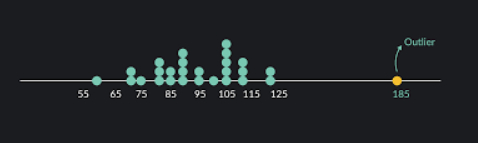
 
 ![alt text](outlier2.png)

## Impact of Outliers on Data Analysis and Modeling:
Outliers can have a significant impact on data analysis and modeling results. They can skew statistical measures, leading to inaccurate estimates of central tendency and dispersion. For example, if a dataset of employee salaries contains a few extremely high salaries due to executive bonuses, the mean salary can be significantly inflated, leading to an overestimated average salary for the organization. Similarly, if a dataset of housing prices contains a few very low prices due to data entry errors, the median price may not accurately represent the typical price of houses in that area.

Outliers can also affect the performance of machine learning models. Some models, such as linear regression, are sensitive to outliers. Outliers with large residuals can disproportionately influence the model’s parameter estimates, leading to biased predictions. For example, in a model that predicts house prices based on features such as square footage and number of bedrooms, an outlier with an unusually high price may strongly impact the regression line, resulting in an inflated predicted price for similar houses. On the other hand, some models, such as decision trees and random forests, are more robust to outliers as they make decisions based on splits that are not affected by individual data points. However, outliers can still impact the tree-building process by affecting the purity of split decisions or the tree’s structure.

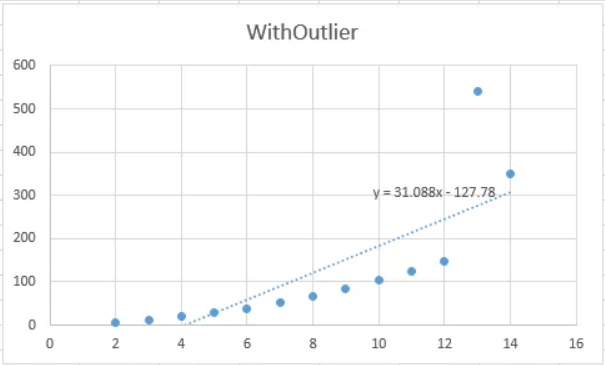

##  Techniques for Detecting Outliers:

The first step in dealing with outliers is to detect them in the dataset. There are several statistical techniques that can be used for outlier detection, such as:

## Box plots: 
Box plots, also known as whisker plots, can visually display the distribution of data and identify potential outliers. In a box plot, the box represents the interquartile range (IQR), which contains the middle 50% of the data, and the whiskers represent the data points within 1.5 times the IQR from the upper and lower quartiles. Data points outside this range are considered potential outliers and are plotted as individual points.

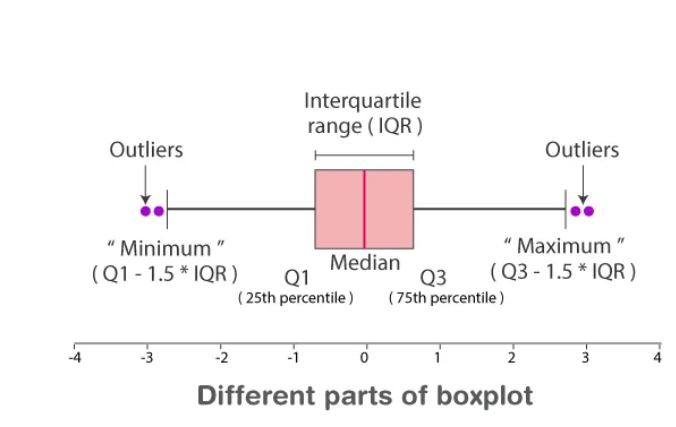

## Scatter plots: 
Scatter plots can be used to identify outliers in bivariate datasets, where two variables are plotted against each other. Outliers can be identified as data points that deviate significantly from the general pattern of the scatter plot

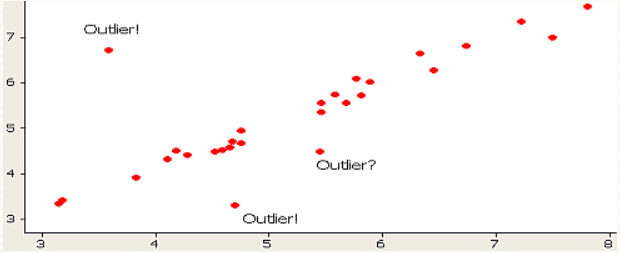

## Z-score: 

The Z-score is a measure that indicates how far a data point is from the mean of the dataset in terms of standard deviations. Z-score can be calculated for each data point and those with a Z-score above a certain threshold (e.g., 2 or 3) can be flagged as potential outliers.


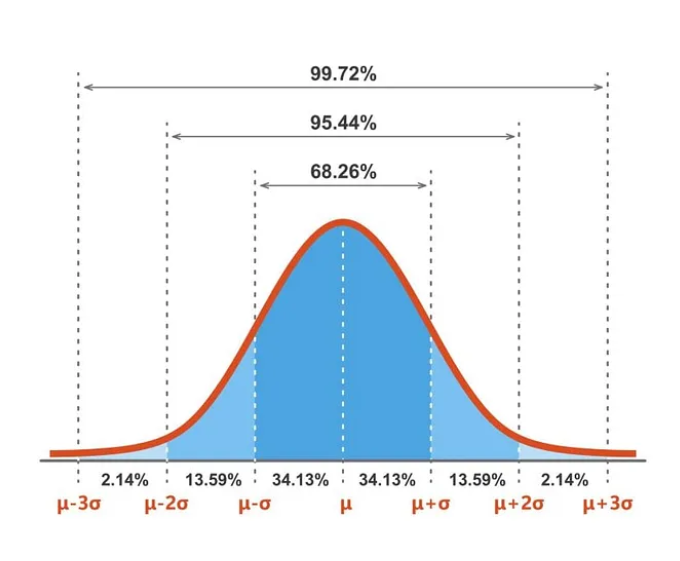

# Advance method for detecting outliers
## PyOD (Python Outlier Detection):
A comprehensive library with a variety of algorithms for outlier detection.
Includes models like AutoEncoder, Deep Isolation Forest,
ECOD: Unsupervised Outlier Detection Using Empirical Cumulative Distribution Functions,
LUNAR: Unifying Local Outlier Detection Methods via Graph Neural Networks and more.



## References

[detecting-and-treating-outliers](https://www.analyticsvidhya.com/blog/2021/05/detecting-and-treating-outliers-treating-the-odd-one-out/)

[general discussions about outlier on kaggle ](https://www.kaggle.com/discussions/general/218717)

[Dealing with Outliers ](https://syedabis98.medium.com/dealing-with-outliers-in-data-science-techniques-and-best-practices-a08172643b7a)

[pyod.read the docs](https://pyod.readthedocs.io/en/latest/)

[Outlier Detection with PyGOD visit github](https://github.com/pygod-team/pygod/?tab=readme-ov-file#roy2024gadnr)

[Outlier Detection with PyGOD read the docs](https://docs.pygod.org/en/latest/)


# Data Transformation 

![data transformatio.png](<attachment:data transformatio.png>)

# Categorical Data

![what is categorical data.png](<attachment:what is categorical data.png>)

![what is encoding.png](<attachment:what is encoding.png>)

![why categorical encoding.png](<attachment:why categorical encoding.png>)

## **Categorical Encoding Technique**

![categorical encoding technique.gif](<attachment:categorical encoding technique.gif>)

[one by one discussion 7-categorical-data-encoding-techniques ](https://blog.dailydoseofds.com/p/7-categorical-data-encoding-techniques?ref=dailydev)

## **When Categorical Encoding Needed  and not Needed**

![encoding yes not.jpeg](<attachment:encoding yes not.jpeg>)

### code implementation for encoding  follow references links

## References
[importent, read this very helpfull [category_encoders ]](https://contrib.scikit-learn.org/category_encoders/)

[data-preprocessing-categorical-encoding](https://www.kaggle.com/code/samybaladram/02-3-data-preprocessing-categorical-encoding)

[Blog-Encoding-Scheme](https://github.com/williamhuybui/Blog-Encoding-Scheme)

[open ipynb files from github [Encode-Categorical-Features] ](https://github.com/sivasaiyadav8143/Encode-Categorical-Features)

[feature-engine encoding library](https://feature-engine.trainindata.com/en/1.7.x/user_guide/encoding/index.html)

[categorical-data-encoding-techniques](https://medium.com/aiskunks/categorical-data-encoding-techniques-d6296697a40f)


# Feature  Scaling 
## **What is Feature Scaling in Machine Learning?**

**Feature scaling** is a **preprocessing technique** used in **machine learning** and **data analysis** to bring all the input features to a similar scale. It is essential because many **machine learning algorithms** are sensitive to the scale of the input features. When features are on different scales, some algorithms might give excessive weight to features with larger scales, leading to biased or inefficient models.

![why scaling required .png](<attachment:why scaling required .png>)

## **Feature Scaling Techniques**


![feature scaling technique.png](<attachment:feature scaling technique.png>)

[feature scaling technuque with code](https://feature-engine.trainindata.com/en/latest/api_doc/transformation/index.html)


![machine learnig algorithm require feature scaling.png](<attachment:machine learnig algorithm require feature scaling.png>)

[When should you use feature scaling in machine learning?](https://spotintelligence.com/2023/07/31/feature-scaling-machine-learning/)

## References

### code implementaiton for scaling follow the following references

[adcance method of scalling](https://feature-engine.trainindata.com/en/latest/api_doc/transformation/index.html)

[github code implementation ](https://www.kaggle.com/code/samybaladram/02-5-data-preprocessing-scaling)

[github complete-guide-to-feature-scaling](https://www.kaggle.com/code/aimack/complete-guide-to-feature-scaling)

[very helpfull all things discuss in this blog in detail so follow that ](https://spotintelligence.com/2023/07/31/feature-scaling-machine-learning/)

[Importance of Feature Scaling](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html)

[read that question on this bolg {When to do Feature Scaling? After Train-Test Split or Before?}](https://ashutoshtripathi.com/2021/06/12/what-is-feature-scaling-in-machine-learning-normalization-vs-standardization/)

[in this   blog  you learn when scaling  is needed  ](https://www.kaggle.com/discussions/getting-started/159643)



# **Feature Selection**

# Feature Selection vs. Feature Extraction

## Differences

| **Feature Selection** | **Feature Extraction** |
|-------------------|---------------------|
| Selects a subset of existing features | Creates new features from existing ones |
| Preserves original features | Transforms original feature space |
| Reduces overfitting | Can capture complex relationships |
| Example: **Lasso, Random Forest** Importance | Example: **PCA, t-SNE** |

![difference between feature selection and extraction.png](<attachment:difference between feature selection and extraction.png>)

## Feature Selection

### Definition
Process of selecting a subset of relevant features for use in model construction.

### Why We Need It
1. Dimensionality reduction
2. Improved model performance
3. Reduced overfitting
4. Faster training and inference

### When to Perform
1. High-dimensional datasets
2. Presence of irrelevant or redundant features
3. Need for model simplification
4. Limited computational resources

# **Feature Selection Techniques**

![python open source feature selection .png](<attachment:python open source feature selection .png>)

![feature selection method library.png](<attachment:feature selection method library.png>)

### **common fileter method**

![common fileter method .png](<attachment:common fileter method .png>)

![filter method characterisics.png](<attachment:filter method characterisics.png>)

### **common wrapper method**

![common wrapper method.png](<attachment:common wrapper method.png>)

![wrapper method characteristics.png](<attachment:wrapper method characteristics.png>)

### **common embedded method**

![common embedded method.png](<attachment:common embedded method.png>)

![embedded method characteristics.png](<attachment:embedded method characteristics.png>)

### **cover all feature selection methods**

![feature selection method.jpeg](<attachment:feature selection method.jpeg>)

# References

[ccomplete guide with code and all links available in this post](https://www.blog.trainindata.com/feature-selection-machine-learning-with-python/)

[**Old is Gold: Explore Detailed Insights and Code Implementation**](https://github.com/krishnadulal/Feature-Selection-in-Machine-Learning-using-Python-All-Code)

[code implementation](https://ranasinghiitkgp.medium.com/implementing-feature-selection-methods-for-machine-learning-bfa2e4b4e02)

[code implementaion of some method and pdf for getting idea about method ](https://github.com/solegalli/DataTalks.Club2022)

[documentation of mlxtend and click on top of API button and see many madule of mlxtend](https://rasbt.github.io/mlxtend/#)

[Feature selection with MLXtend ](https://rasbt.github.io/mlxtend/api_subpackages/mlxtend.feature_selection/)

[Scikit-learn feature selection](https://scikit-learn.org/stable/modules/feature_selection.html)

[Feature selection with Feature-engine ](https://feature-engine.trainindata.com/en/latest/api_doc/selection/index.html)




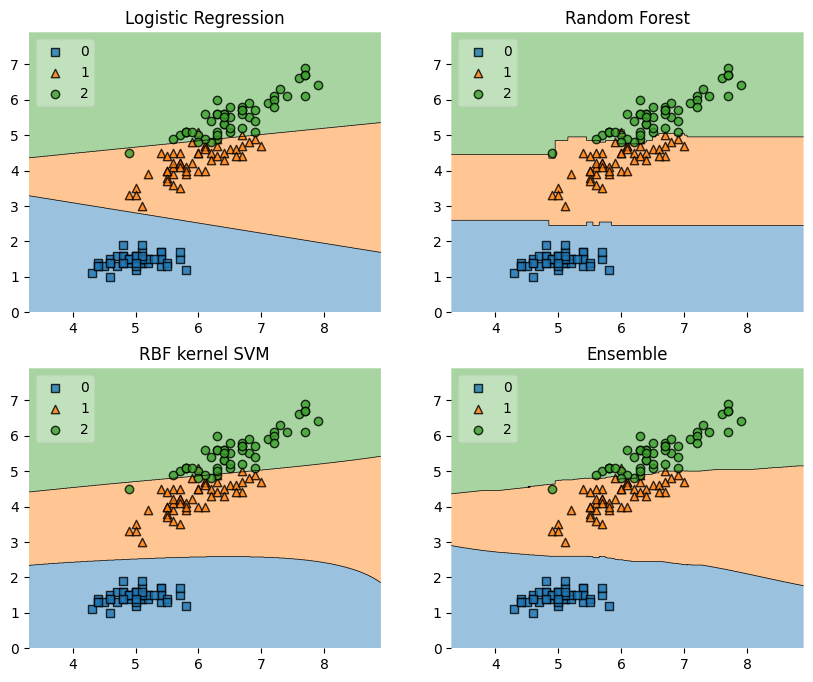

In [4]:
# this code is copied from the https://rasbt.github.io/mlxtend/#
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import itertools
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from mlxtend.classifier import EnsembleVoteClassifier
from mlxtend.data import iris_data
from mlxtend.plotting import plot_decision_regions

# Initializing Classifiers
clf1 = LogisticRegression(random_state=0)
clf2 = RandomForestClassifier(random_state=0)
clf3 = SVC(random_state=0, probability=True)
eclf = EnsembleVoteClassifier(clfs=[clf1, clf2, clf3], weights=[2, 1, 1], voting='soft')

# Loading some example data
X, y = iris_data()
X = X[:,[0, 2]]

# Plotting Decision Regions
gs = gridspec.GridSpec(2, 2)
fig = plt.figure(figsize=(10, 8))

for clf, lab, grd in zip([clf1, clf2, clf3, eclf],
                         ['Logistic Regression', 'Random Forest', 'RBF kernel SVM', 'Ensemble'],
                         itertools.product([0, 1], repeat=2)):
    clf.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X, y=y, clf=clf, legend=2)
    plt.title(lab)
plt.show()

<style>
    .title {
        color: #2c3e50; /* Dark Slate Blue for headings */
        font-weight: bold;
        font-size: 1.5em;
        margin-top: 20px;
    }
    .section-title {
        color: #2980b9; /* Blue for section titles */
        font-weight: bold;
        font-size: 1.3em;
        margin-top: 15px;
    }
    .important {
        color: #e74c3c; /* Red for important text */
        font-weight: bold;
    }
    .emphasis {
        color: #27ae60; /* Green for emphasis */
        font-style: italic;
    }
    .note {
        background-color: #f9f9f9;
        border-left: 5px solid #2980b9;
        padding: 10px;
        margin: 20px 0;
    }
    .signature {
        color: #7f8c8d; /* Gray for signature */
        font-weight: bold;
        font-size: 1.1em;
        text-align: right;
    }
</style>

<div class="section-title">Overall Structure and Flow</div>

The current structure of the notebook is solid, with well-organized sections dedicated to various aspects of data preprocessing and feature engineering. Each section is thoughtfully crafted to guide the reader through complex topics step by step.

<div class="section-title">Introduction and Importance</div>

While the introduction provides a brief overview, by highlighting the <span class="important">critical role</span> feature engineering plays in the success of machine learning models. so that It's essential to convey to the reader that without proper feature engineering, even the most sophisticated models may fail to deliver accurate predictions.

<div class="section-title"> Final Note</div>

This notebook has the potential to be an invaluable resource for data scientists at all levels. By implementing the above suggestions, it can serve not only as an educational guide but also as a practical reference for real-world data preprocessing and feature engineering tasks.

<div class="note">
    <strong>Note:</strong> Thank you for your attention to these details, and I encourage you to continue refining and expanding this guide to maximize its impact on the data science community.
</div>

<div class="signature">Best regards,</div>
<div class="signature">Khalil Haider</div>
